

# **About Dataset**
# Problem Statement **bold text**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Column Information

People

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years
Promotion

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

Target

Need to perform clustering to summarize customer segments.




# **Importing the libraries and dataset**

In [1]:
import  pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('project3.xlsx')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# **Data Understanding**

In [3]:
data.shape

(2240, 29)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [5]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


# **Exploratory data analysis**

# Data Cleaning & visualization

In [6]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

since there are some missing values in Income we will check that column and replace missing values with mean or median

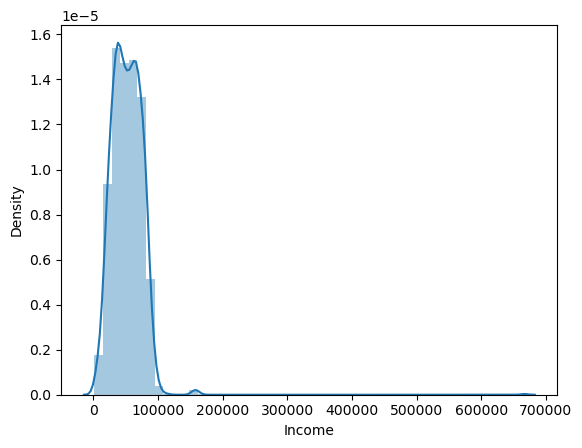

In [7]:
sns.distplot(data['Income'])
plt.show()

since the data is left skewed we will replace the missing values with median

In [8]:
#FILL THE MISSING VALUES WITH THE MEDIAN VALUES..
data['Income']=data['Income'].fillna(data['Income'].median())

In [9]:
#checking duplicates
data[data.duplicated()]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [10]:
#FINDING THE NUMBER OF UNIQUE VALUES PRESENT IN EACH COLUMN...
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Note:-In above cell "Z_CostContact" and "Z_Revenue" have same value in all the rows that's why , they are not going to contribute anything in the model building. So we can drop them.

In [11]:
data=data.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

# Univariate Analysis

1.Analysis on Year_Birth Variable.**

In [12]:
def uni_V(col):
    plt.figure(figsize=(20,8))
    sns.countplot(x=col,data=data)
    plt.xticks(rotation=90)
    plt.show()

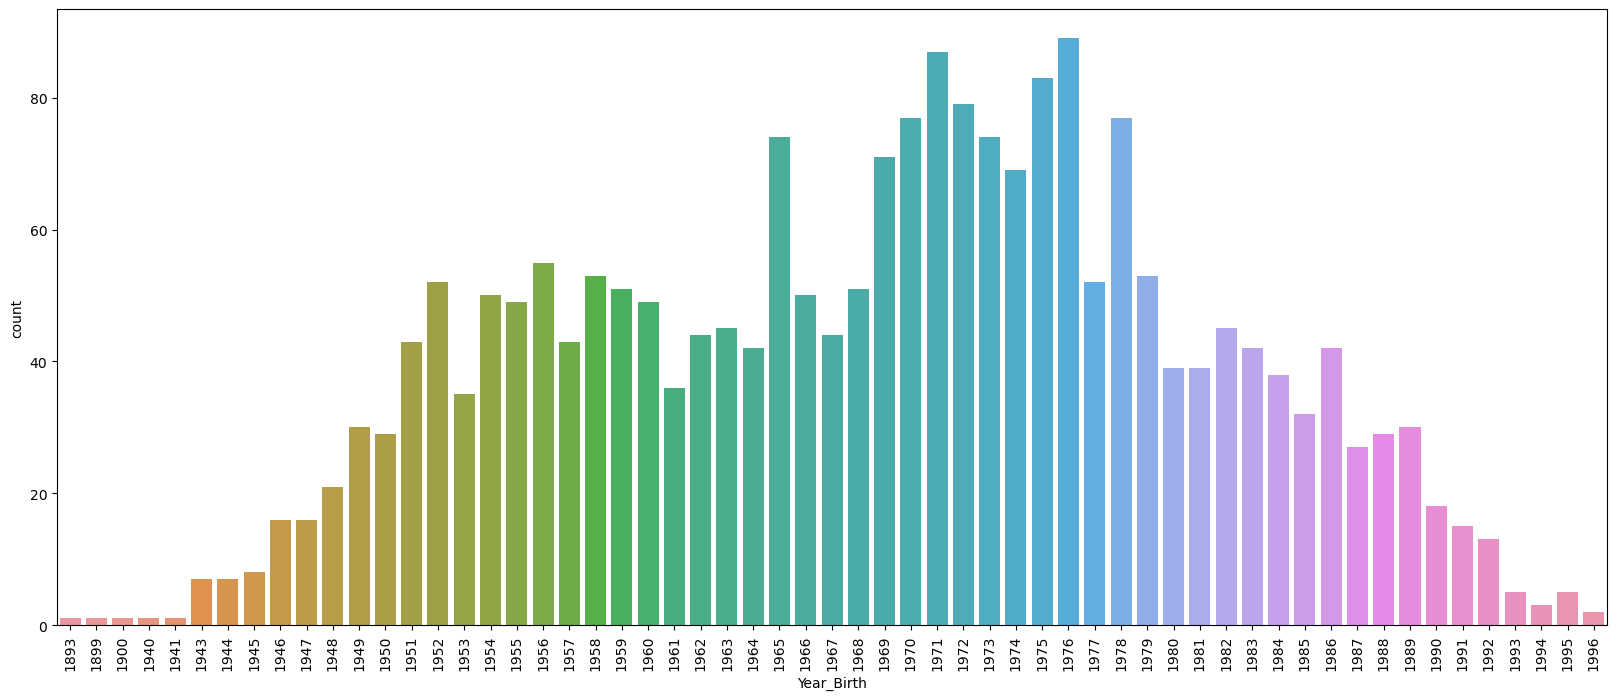

In [13]:
uni_V('Year_Birth')


Data points in year birth are uniformly distributed

2.Analysis On Education Variable.

In [14]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [15]:
#CHANGING CATEGORY INTO "UG" AND "PG" ONLY....
data['Education'] = data['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')
data['Education'] = data['Education'].replace(['Basic'], 'Under Graduate')

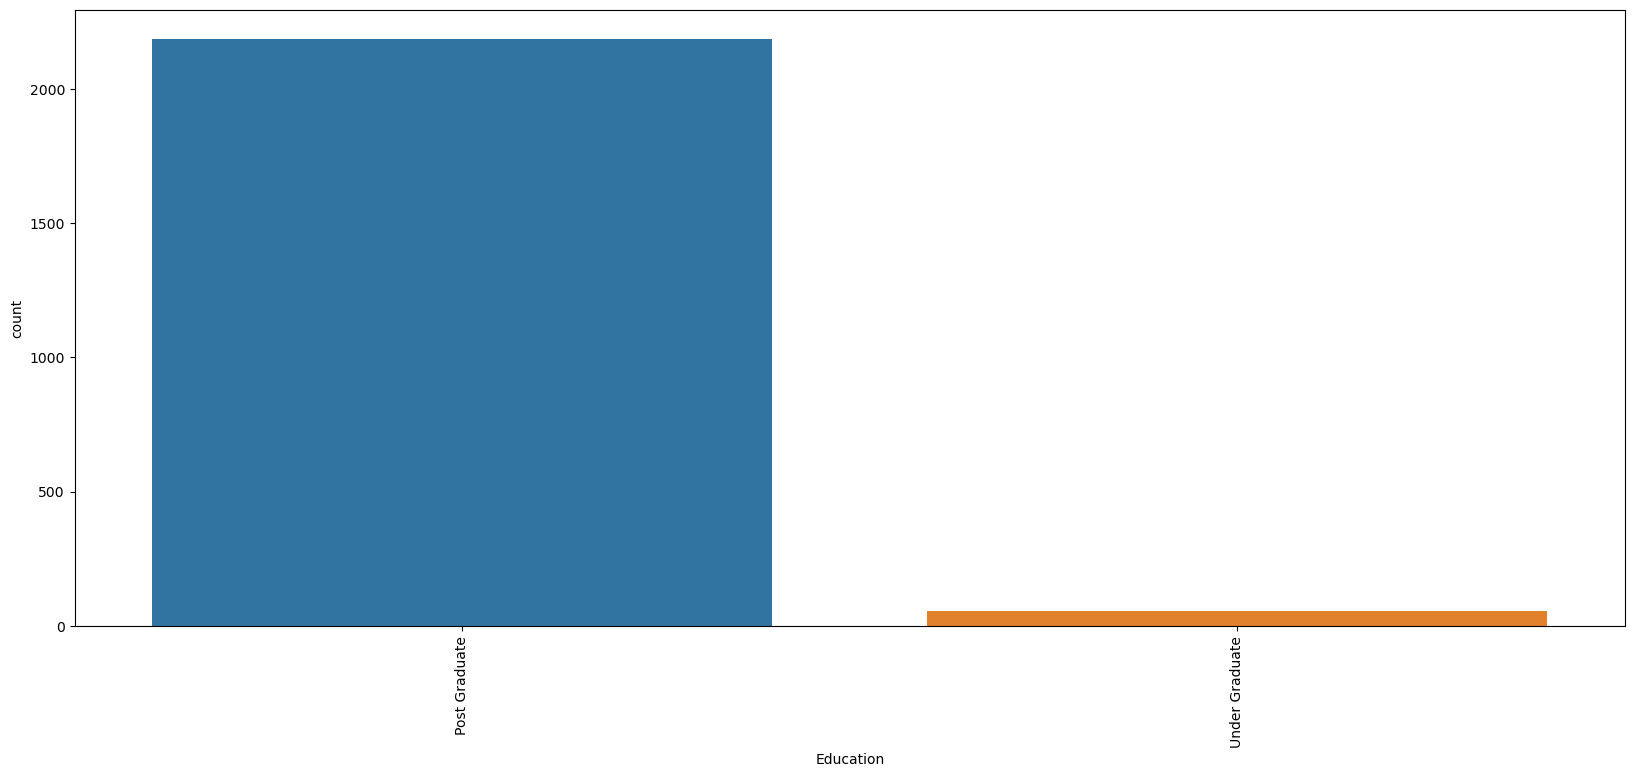

In [16]:
uni_V('Education')

We observed that most of the data points here are post-Graduated

3.Analysis On Marital_Status Variable.

In [17]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [18]:
#REPLACING THE CONFLICT VALUES IN Marital_status..
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'],'Relationship')
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

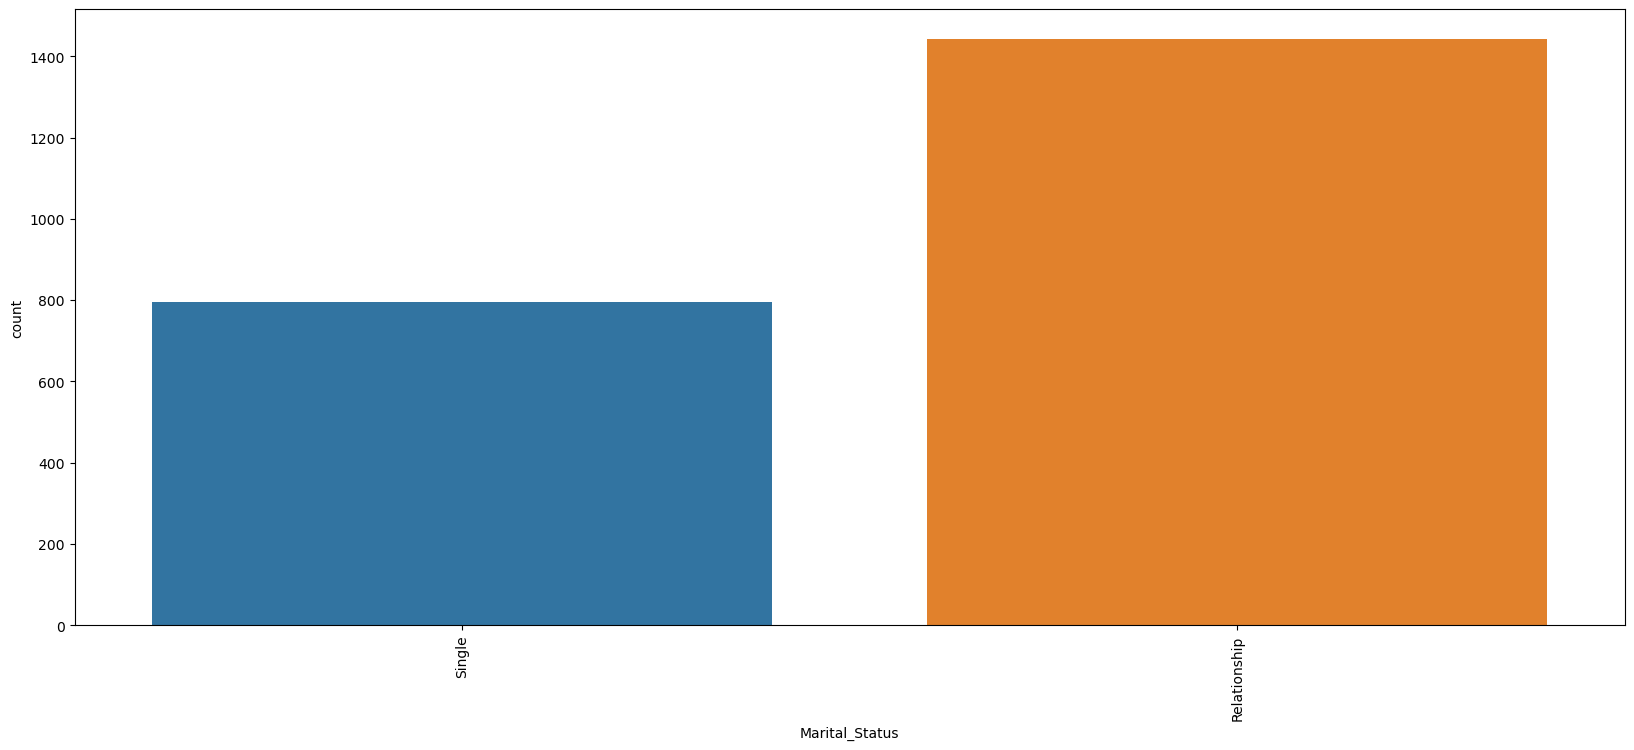

In [19]:
uni_V('Marital_Status')

4.Analysis On Income Variable.

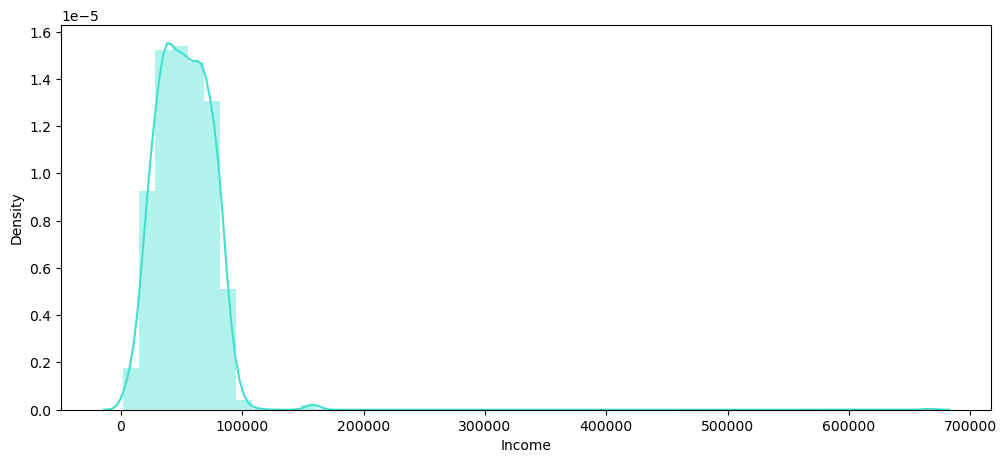

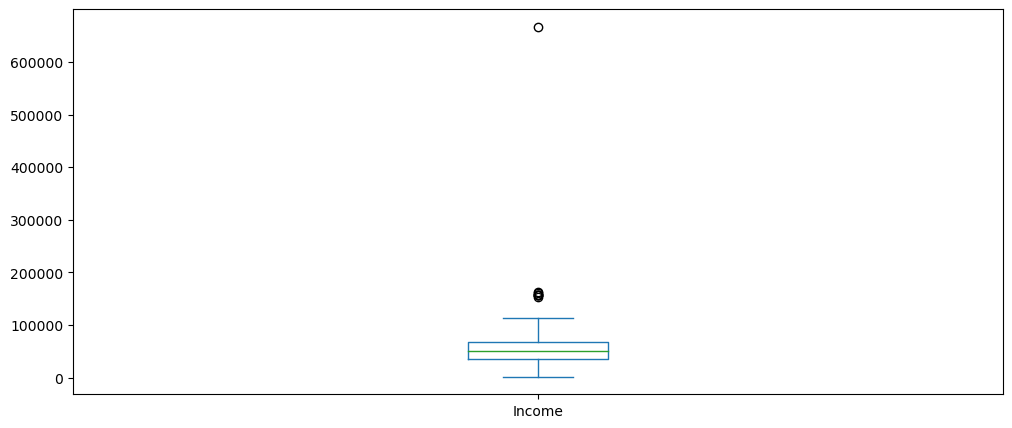

In [20]:
plt.figure(figsize=(12,5))
sns.distplot(data["Income"],color = 'turquoise')
plt.show()
data["Income"].plot.box(figsize=(12,5))
plt.show()

The income column is left skewed and also have outliers

Removing outliers


In [21]:
#Removing outliers in income
# Let's define a funtion to find interquantile range borders
def find_IQR(data, column):
  q_25, q_75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)
  IQR = q_75 - q_25
  whiskers_range = IQR * 1.5
  lower, upper = q_25 - whiskers_range, whiskers_range + q_75
  return lower, upper


In [22]:
lower_income, upper_income = find_IQR(data, "Income")
print(lower_income, upper_income)

-13587.75 117416.25


In [23]:
# Drop the outliers
data = data[(data["Income"] < upper_income)]

5.Analysis On "Kidhome,Teenhome" Variable.

In [24]:
data['Teenhome'].unique()

array([0, 1, 2], dtype=int64)

In [25]:
data['Kidhome'].unique()

array([0, 1, 2], dtype=int64)

In [26]:
# Combining different dataframe into a single column to reduce the number of dimension

data['Kids'] = data['Kidhome'] + data['Teenhome']

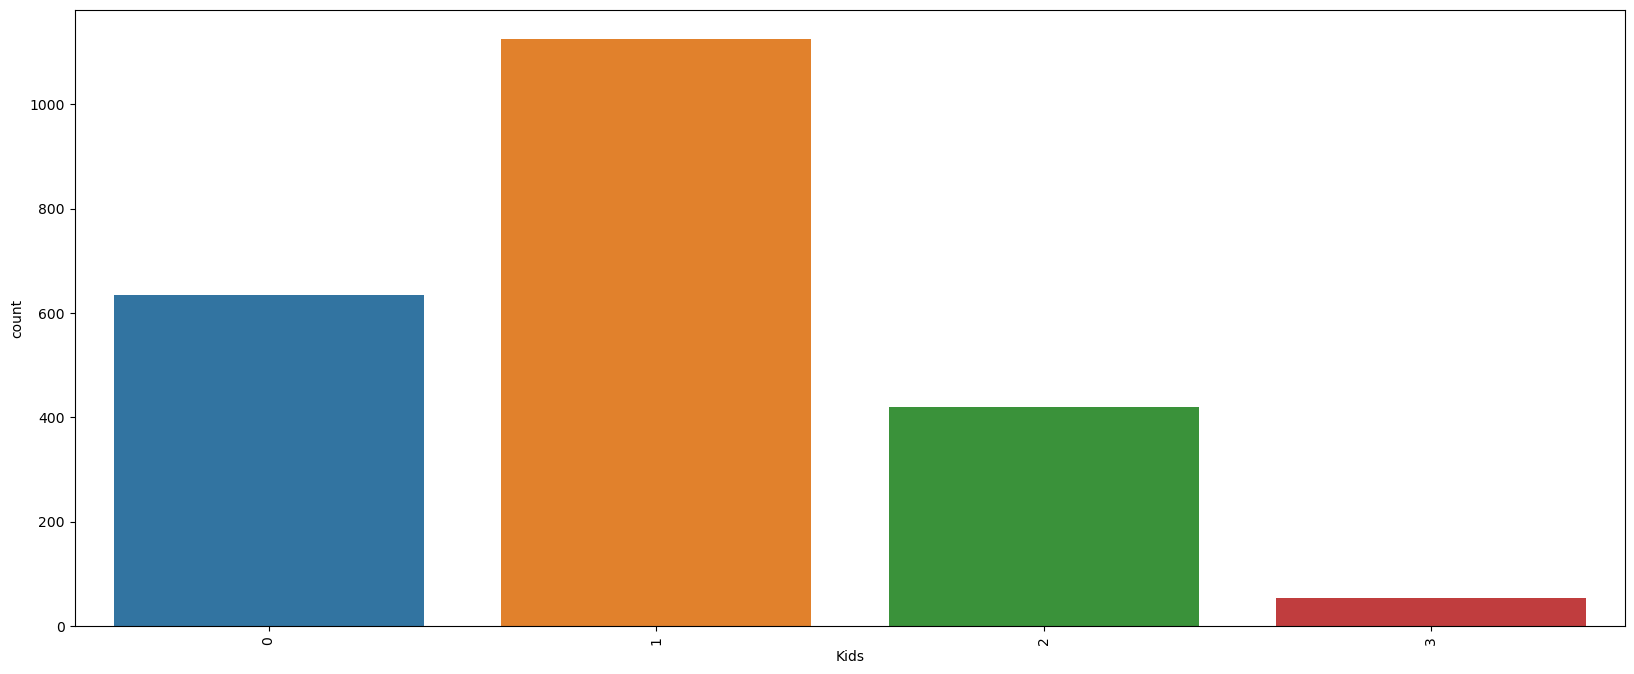

In [27]:
uni_V('Kids')

Most of the customers has 1 kid

6.Analysis On "MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds" Variable.

In [28]:
# Combining different dataframe into a single column to reduce the number of dimension

data['Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['Expenses'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Expenses, dtype: int64

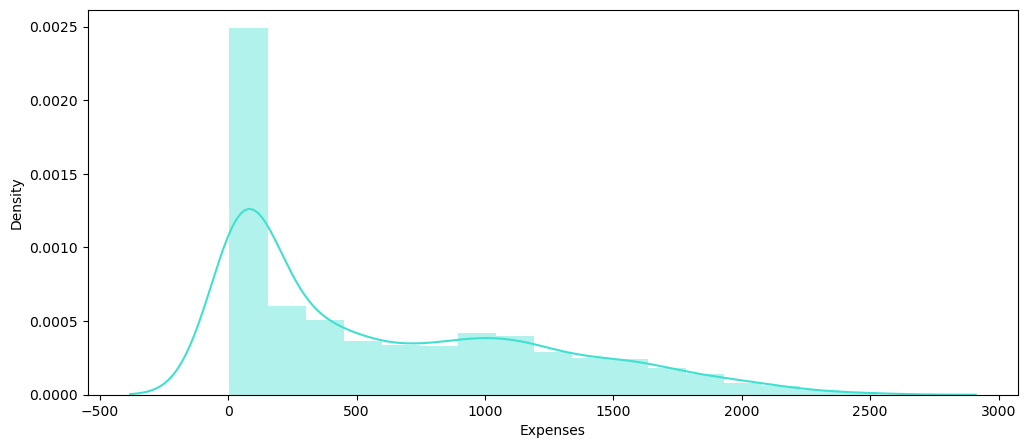

In [29]:
plt.figure(figsize=(12,5))
sns.distplot(data["Expenses"],color = 'turquoise')
plt.show()

7.Analysis on "AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5" Variable.

In [30]:
data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

Unique categories present in the TotalAcceptedCmp: TotalAcceptedCmp
0    1769
1     325
2      83
3      44
4      11
Name: count, dtype: int64




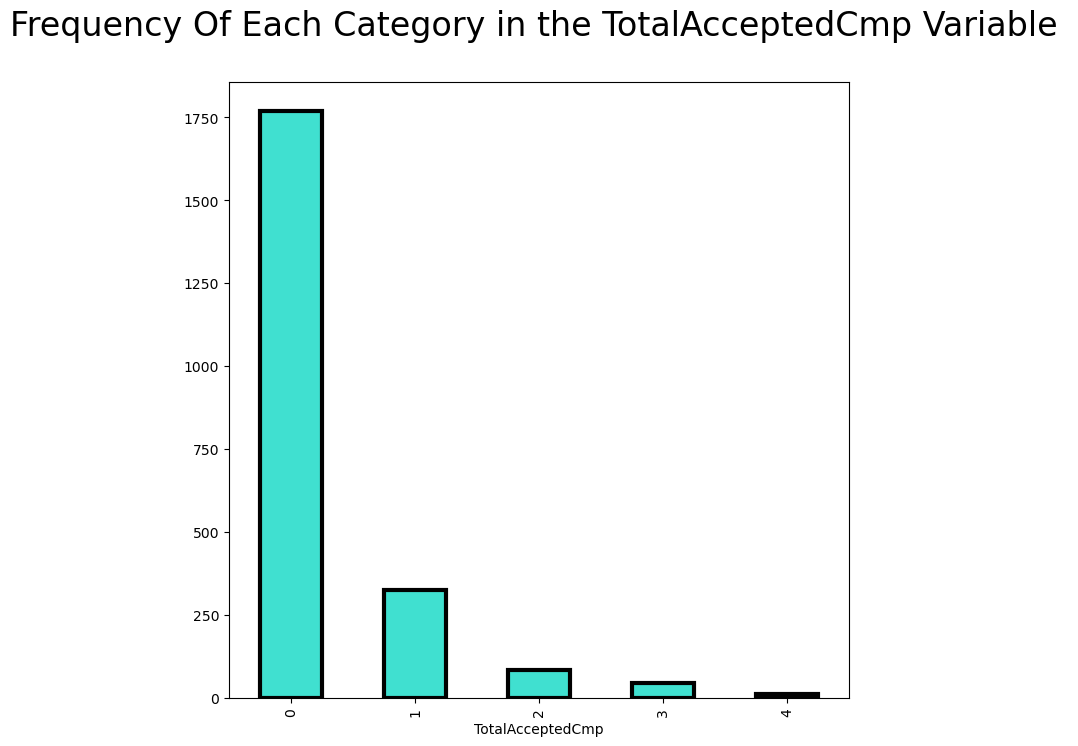

In [31]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "TotalAcceptedCmp"
print("Unique categories present in the TotalAcceptedCmp:",data['TotalAcceptedCmp'].value_counts())
print("\n")

#VISUALIZING THE "TotalAcceptedCmp"


plt.figure(figsize=(8,8))
data['TotalAcceptedCmp'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the TotalAcceptedCmp Variable \n",fontsize=24)
plt.show()

 Most of the Customers accepted the offer in the campaign are "0"

8.Analysis on "NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases" Variable.

In [32]:
data['NumTotalPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']
data['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 31, 33, 35, 39,
       34,  1,  0], dtype=int64)

In [33]:
data[['NumTotalPurchases']]


,NumTotalPurchases
0,25
1,6
2,21
3,8
4,19
...,...
2235,18
2236,22
2237,19
2238,23


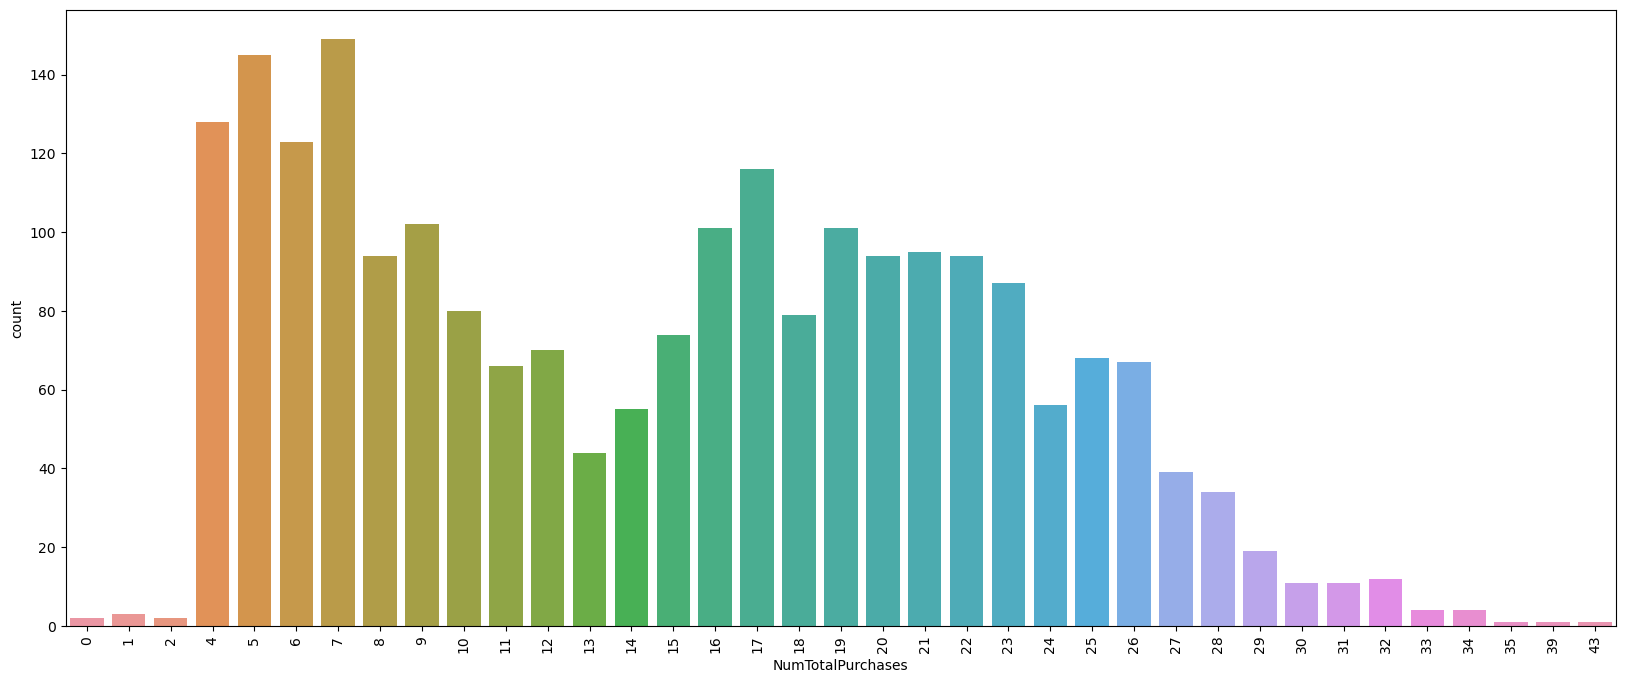

In [34]:
uni_V('NumTotalPurchases')

9. Converting the Year_Birth to customer_Age

In [35]:
#ADDING A COLUMN "customer_Age" IN THE DATAFRAME....
data['Customer_Age'] = (pd.Timestamp('now').year) - data['Year_Birth']
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,1,0,1617,0,25,67
1,2174,1954,Post Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,2,27,0,6,70
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,776,0,21,59
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,1,53,0,8,40
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,1,422,0,19,43


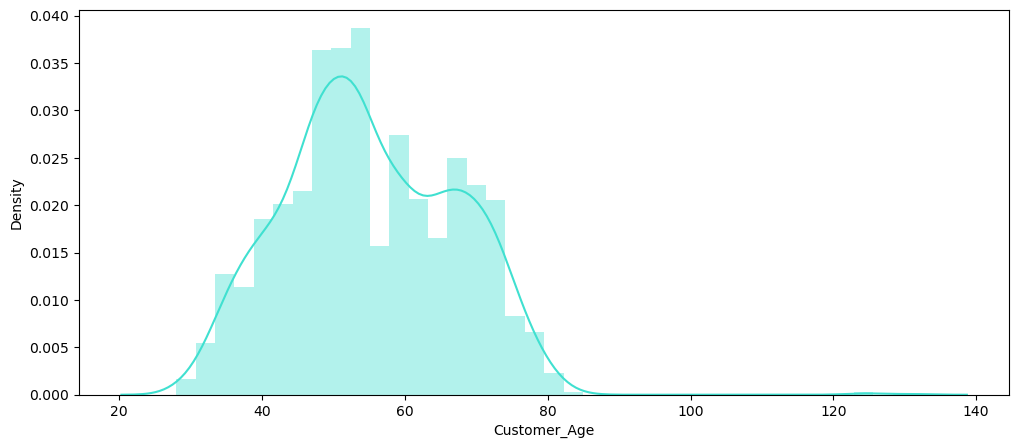

In [36]:
plt.figure(figsize=(12,5))
sns.distplot(data["Customer_Age"],color = 'turquoise')
plt.show()

Most of the cutomers we have are in middle age i.e between 35-55

Text(0.5, 1.0, '"Age" Box-plot')

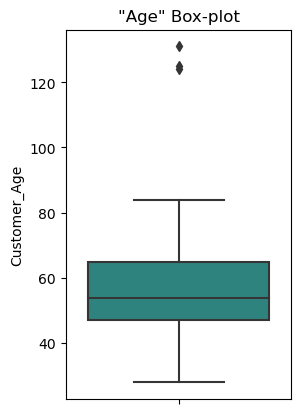

In [37]:
plt.subplot(1, 2, 2)
sns.boxplot(y = data.Customer_Age, palette="viridis")
plt.title("\"Age\" Box-plot")

In [38]:
#Removing outliers in Age
lower_age, upper_age = find_IQR(data, "Customer_Age")
print(lower_age, upper_age)

20.0 92.0


In [39]:
# Drop the outliers
data = data[(data["Customer_Age"] < upper_age)]

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2229 non-null   int64         
 1   Year_Birth           2229 non-null   int64         
 2   Education            2229 non-null   object        
 3   Marital_Status       2229 non-null   object        
 4   Income               2229 non-null   float64       
 5   Kidhome              2229 non-null   int64         
 6   Teenhome             2229 non-null   int64         
 7   Dt_Customer          2229 non-null   datetime64[ns]
 8   Recency              2229 non-null   int64         
 9   MntWines             2229 non-null   int64         
 10  MntFruits            2229 non-null   int64         
 11  MntMeatProducts      2229 non-null   int64         
 12  MntFishProducts      2229 non-null   int64         
 13  MntSweetProducts     2229 non-null   i



In the next step, I am going to create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record.

Thus to get the values I must check the newest and oldest recorded dates.


In [41]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date

In [42]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data['Customer_For'] = data['Customer_For'].apply(lambda x:x.days)

In [43]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["Year_Birth","ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds",'Dt_Customer','Recency','Complain','Response']
data=data.drop(columns=col_del,axis=1)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2229 non-null   object 
 1   Marital_Status     2229 non-null   object 
 2   Income             2229 non-null   float64
 3   Kids               2229 non-null   int64  
 4   Expenses           2229 non-null   int64  
 5   TotalAcceptedCmp   2229 non-null   int64  
 6   NumTotalPurchases  2229 non-null   int64  
 7   Customer_Age       2229 non-null   int64  
 8   Customer_For       2229 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 174.1+ KB


In [45]:
# correlation matrix
corr = data.corr()
plt.figure(figsize=[20, 10])
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();

ValueError: could not convert string to float: 'Post Graduate'



Income is more positively correlated to Expenses and Number of purchases

Expenses is positively correlated to Income and Number of pur chases and negitively correlated with Kids


# Bivariate Analysis

# 1.Education vs Expenses

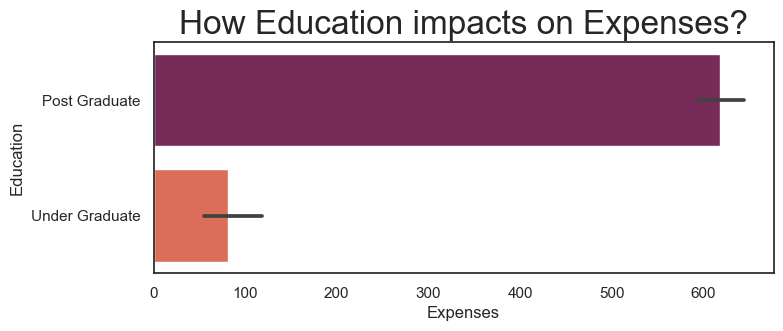

In [46]:
sns.set_theme(style="white")
plt.figure(figsize=(8,3))
plt.title("How Education impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Expenses", y="Education", data=data,palette="rocket")


We observe that the post graduated people spends more than the UG people


# 2.Marital status vs Expenses

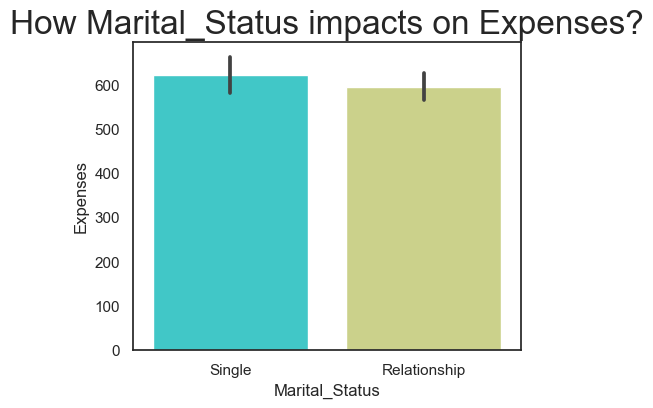

In [47]:
sns.set_theme(style="white")
plt.figure(figsize=(5,4))
plt.title("How Marital_Status impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Marital_Status", y="Expenses", data=data,palette="rainbow")

# 3.Kids vs Expenses

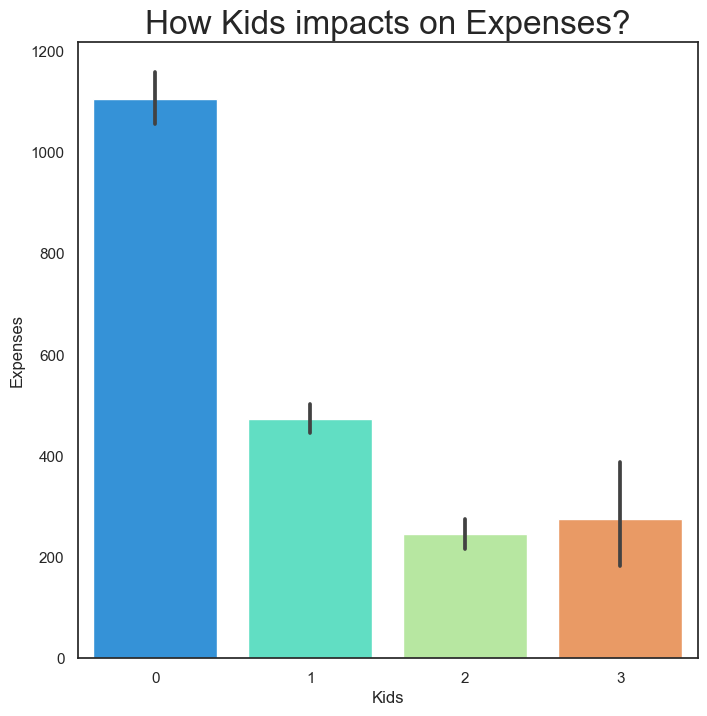

In [48]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Kids impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Kids", y="Expenses", data=data,palette="rainbow")

Here we observe some thing different that parents with 1 kid spends more than the parents who are having 2 or 3 kids

# 4.TotalAcceptedCmp vs Expenses

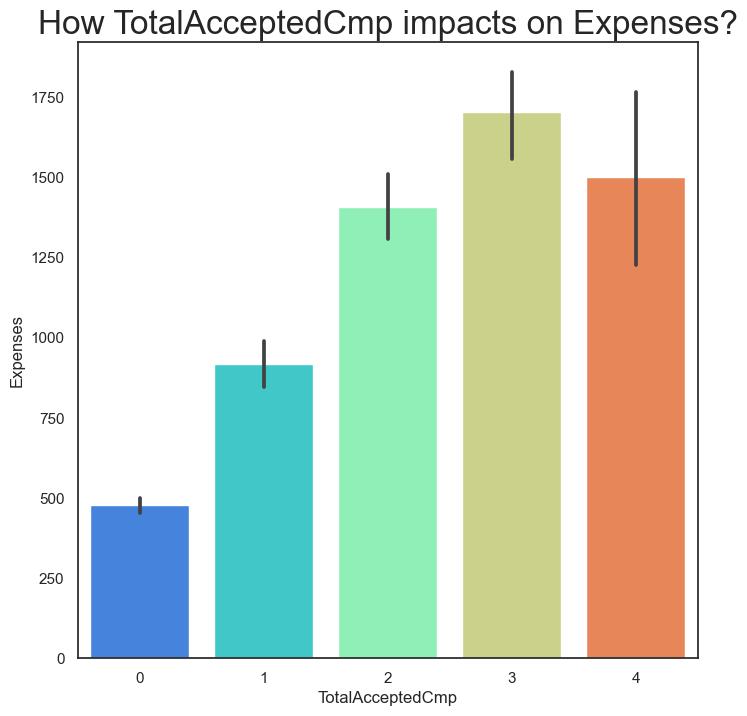

In [49]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How TotalAcceptedCmp impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="TotalAcceptedCmp", y="Expenses", data=data,palette="rainbow")

those who accepeted more campaign have more expenses

5.NumTotalPurchases vs Expenses

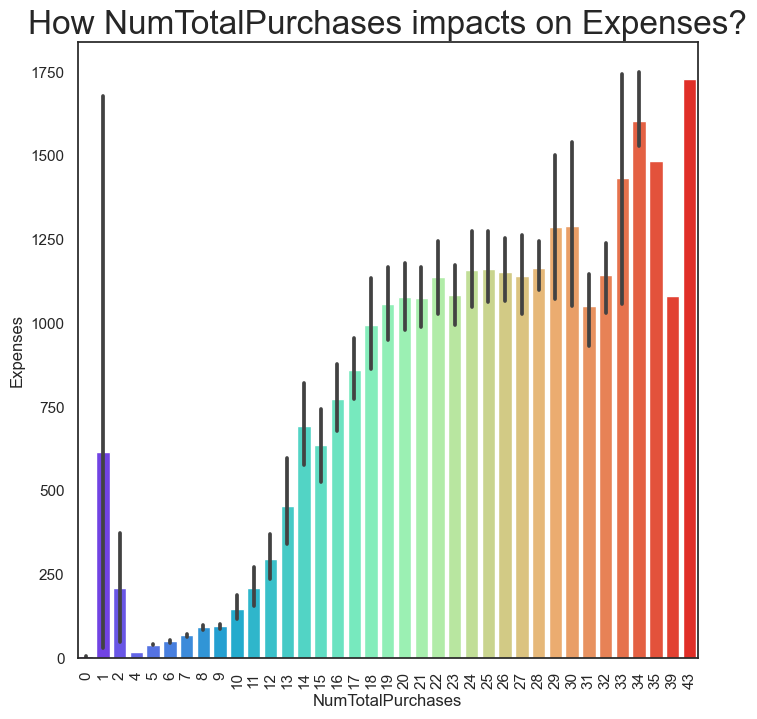

In [50]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How NumTotalPurchases impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.barplot(x="NumTotalPurchases", y="Expenses", data=data,palette="rainbow")

Those who have more purchases have more expenses

6.Day engaged vs Expenses

In [52]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases', 'Customer_Age',
       'Customer_For'],
      dtype='object')

# 7.Customer Age vs Expenses

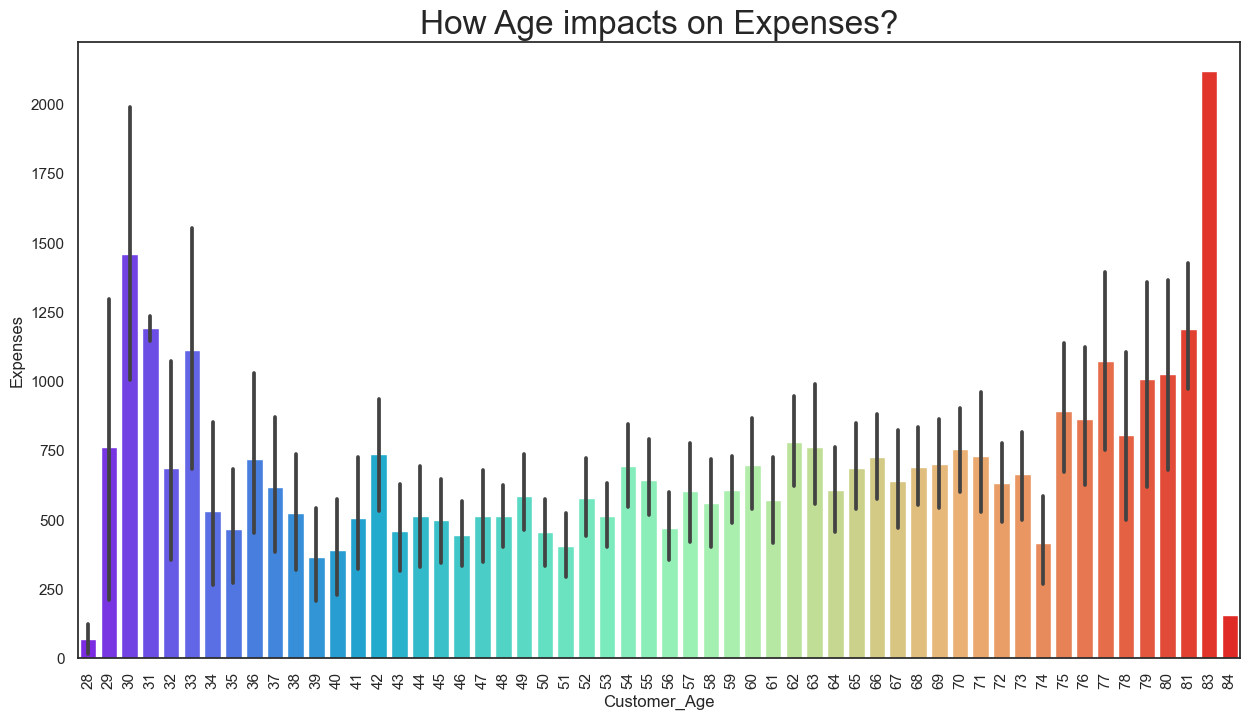

In [51]:
sns.set_theme(style="white")
plt.figure(figsize=(15,8))
plt.title("How Age impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.barplot(x="Customer_Age", y="Expenses", data=data,palette="rainbow")

plt.show()

People who are in middle age have less expenses than others

In [53]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
data_scaled = data.copy()

data_scaled['Education'] = label_encoder.fit_transform(data_scaled['Education'])
data_scaled['Marital_Status'] = label_encoder.fit_transform(data_scaled['Marital_Status'])

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_scale = ['Income', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases', 'Customer_Age', 'Customer_For']

data_scaled[col_scale] = scaler.fit_transform(data_scaled[col_scale])


In [56]:
data_scaled.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,0,1,0.316484,-1.266277,1.683247,-0.439754,1.329444,1.015715,1.529265
1,0,1,-0.256135,1.393978,-0.962795,-0.439754,-1.163838,1.272020,-1.190769
2,0,0,0.970719,-1.266277,0.283674,-0.439754,0.804543,0.332234,-0.206611
3,0,0,-1.212506,0.063851,-0.919526,-0.439754,-0.901387,-1.291031,-1.062186
4,0,0,0.324010,0.063851,-0.305445,-0.439754,0.542092,-1.034726,-0.953384


# **Dimensionality reduction**

Principal Component Analysis (PCA) - is one of such techniques. It will help us to minimize the information loss and increase the possibility of data to be interpreted better. Before start, the amount of principal vectors should be chosen - I will choose the amount of 3, because I want to have opportunity to visualize the data and save as much information as I can at the same time

In [57]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA(n_components=3)
pca.fit(data_scaled)
principal_data = pd.DataFrame(pca.transform(data_scaled), columns=(["PC_1","PC_2", "PC_3"]))

In [59]:
principal_data.head()

,PC_1,PC_2,PC_3
0,2.213361,-0.746434,-1.491667
1,-1.739677,-1.396675,1.478696
2,1.304281,-0.020424,0.198363
3,-1.942280,1.279054,0.565018
4,-0.103350,0.602272,0.514678


In [60]:
# Define vector comtaining coordinates (row = object)
x = principal_data['PC_1']
y = principal_data['PC_2']
z = principal_data['PC_3']



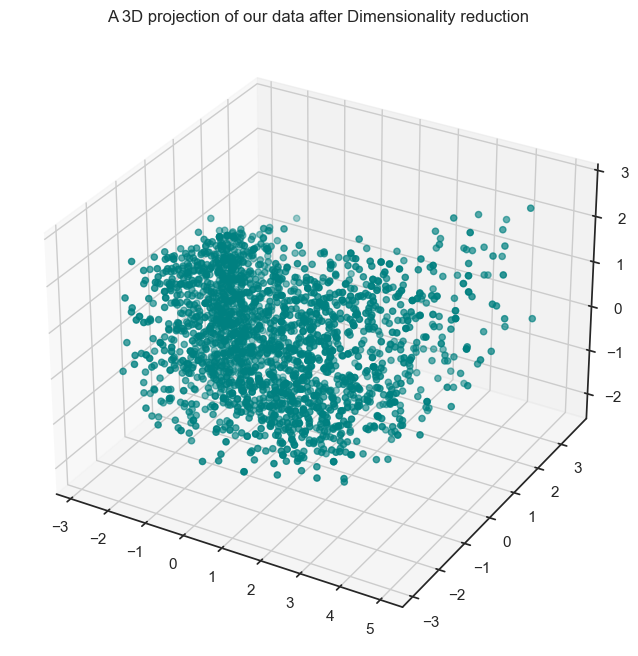

In [61]:
# Plot data
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x, y, z, c='teal', marker='o')
ax.set_title("A 3D projection of our data after Dimensionality reduction")
plt.show()


In [62]:
!pip install yellowbrick
     

  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)


In [65]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(principal_data)
    wcss.append(km.inertia_)

In [66]:
wcss

[11631.099049067347,
 6453.869471830436,
 5205.1325684060375,
 4295.6080123869,
 3740.311391323456,
 3252.148682078788,
 2914.4291085318346,
 2647.6570176559608,
 2450.1693332330456,
 2290.5721122845644]

Text(0.5, 1.0, 'Elbow Graph')

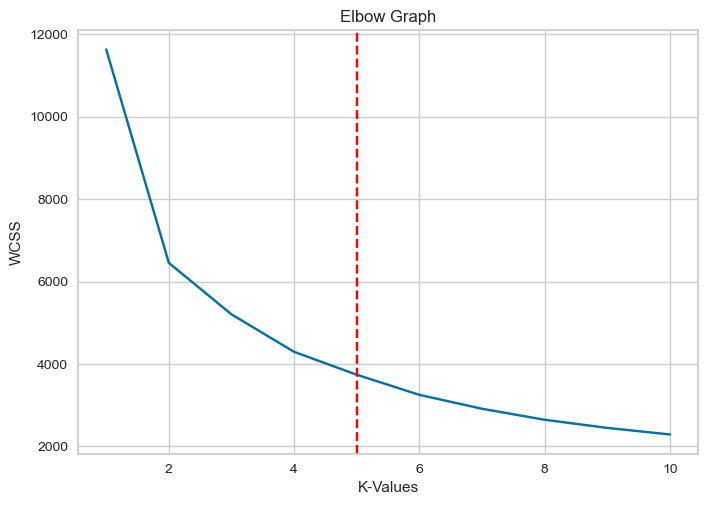

In [67]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 5, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [68]:
## value of k =5

In [103]:
km = KMeans(n_clusters=6)
ypred = km.fit_predict(principal_data)
ypred

array([1, 0, 4, ..., 2, 4, 0])

In [96]:
len(ypred)

2229

In [104]:
principal_data["Clusters"] = ypred
principal_data

,PC_1,PC_2,PC_3,Clusters
0,2.213361,-0.746434,-1.491667,1
1,-1.739677,-1.396675,1.478696,0
2,1.304281,-0.020424,0.198363,4
3,-1.942280,1.279054,0.565018,5
4,-0.103350,0.602272,0.514678,4
...,...,...,...,...
2224,0.966666,-0.398294,-0.225915,1
2225,0.155423,-2.658427,2.149402,0
2226,1.494102,1.717716,0.792107,2
2227,1.034686,-1.218468,1.013771,4


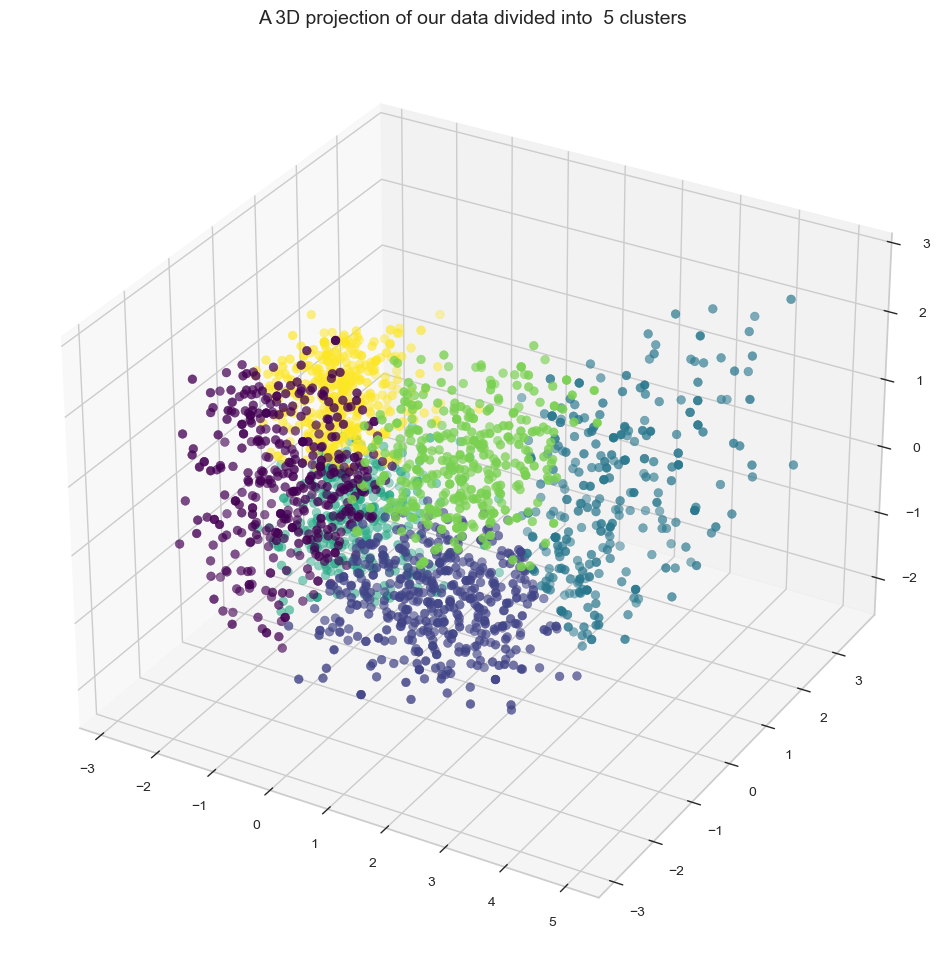

In [105]:
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(111, projection='3d', label="bla")

ax.scatter(x, y, z, s=40, c=principal_data["Clusters"], marker='o', cmap="viridis")
ax.set_title("A 3D projection of our data divided into  5 clusters", fontsize = 14)
plt.show()
     

In [84]:
from sklearn.metrics import silhouette_score

In [106]:
silhouette_score(principal_data,ypred)

0.4733972245982723